# TSF Intern 
## Name - P Dhanush
## Task 4 -  Exploratory Analysis on Terrosim

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
import seaborn as sb
import warnings
import os
from sklearn import preprocessing
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
url = 'globalterrorismdb_0718dist.csv'
df = pd.read_csv(url,encoding='latin1')
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Renaming the columns

In [3]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region',
                     'provstate':'State','city':'City','latitude':'latitude','longitude':'longitude','summary':'summary',
                     'attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
                     'nwound':'Wound'},inplace=True)

### Keeping necessary columns

In [4]:
df = df[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]
df.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


### Info about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   State       181270 non-null  object 
 5   Region      181691 non-null  object 
 6   City        181257 non-null  object 
 7   latitude    177135 non-null  float64
 8   longitude   177134 non-null  float64
 9   Attacktype  181691 non-null  object 
 10  kill        171378 non-null  float64
 11  Wound       165380 non-null  float64
 12  target1     181055 non-null  object 
 13  summary     115562 non-null  object 
 14  Group       181691 non-null  object 
 15  Targettype  181691 non-null  object 
 16  Weapon      181691 non-null  object 
 17  motive      50561 non-null   object 
dtypes: float64(4), int64(3), object(11)
memory u

### Detailed Description of the Dataset

In [6]:
df.describe(include = 'all')

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
count,181691.000000,181691.000000,181691.000000,181691,181270,181691,181257,177135.000000,1.771340e+05,181691,171378.000000,165380.000000,181055,115562,181691,181691,181691,50561
unique,NaN,NaN,NaN,205,2855,12,36674,NaN,NaN,9,NaN,NaN,86006,112492,3537,22,12,14490
top,NaN,NaN,NaN,Iraq,Baghdad,Middle East & North Africa,Unknown,NaN,NaN,Bombing/Explosion,NaN,NaN,Civilians,"09/00/2016: Sometime between September 18, 201...",Unknown,Private Citizens & Property,Explosives,Unknown
freq,NaN,NaN,NaN,24636,7645,50474,9775,NaN,NaN,88255,NaN,NaN,6461,100,82782,43511,92426,14889
mean,2002.638997,6.467277,15.505644,NaN,NaN,NaN,NaN,23.498343,-4.586957e+02,NaN,2.403272,3.167668,NaN,NaN,NaN,NaN,NaN,NaN
std,13.259430,3.388303,8.814045,NaN,NaN,NaN,NaN,18.569242,2.047790e+05,NaN,11.545741,35.949392,NaN,NaN,NaN,NaN,NaN,NaN
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,-53.154613,-8.618590e+07,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1991.000000,4.000000,8.000000,NaN,NaN,NaN,NaN,11.510046,4.545640e+00,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2009.000000,6.000000,15.000000,NaN,NaN,NaN,NaN,31.467463,4.324651e+01,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2014.000000,9.000000,23.000000,NaN,NaN,NaN,NaN,34.685087,6.871033e+01,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN


### Displaying no. of null values per column

In [7]:
df.isnull().sum()

Year               0
Month              0
day                0
Country            0
State            421
Region             0
City             434
latitude        4556
longitude       4557
Attacktype         0
kill           10313
Wound          16311
target1          636
summary        66129
Group              0
Targettype         0
Weapon             0
motive        131130
dtype: int64

### Unique values in each column

In [8]:
for i in df.columns:
    print('{} consists {} unique values.'.format(i,len(df[i].unique())))

Year consists 47 unique values.
Month consists 13 unique values.
day consists 32 unique values.
Country consists 205 unique values.
State consists 2856 unique values.
Region consists 12 unique values.
City consists 36675 unique values.
latitude consists 48323 unique values.
longitude consists 48040 unique values.
Attacktype consists 9 unique values.
kill consists 206 unique values.
Wound consists 239 unique values.
target1 consists 86007 unique values.
summary consists 112493 unique values.
Group consists 3537 unique values.
Targettype consists 22 unique values.
Weapon consists 12 unique values.
motive consists 14491 unique values.


## Description about 'Object' Datatypes

### Inference on 'Country' column

In [9]:
country_df = df.Country.value_counts()[:15]
country_df

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country, dtype: int64

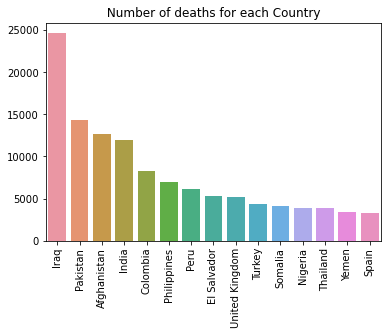

In [10]:
sb.barplot(country_df.index,country_df.values)
plt.title(' Number of deaths for each Country ')
plt.xticks(rotation=90)
plt.show()

In [11]:
print('Most affected Country is {}'.format(df['Country'].value_counts().idxmax(),df['Country'].value_counts().idxmax()))
print('Least affected Country is {}'.format(df['Country'].value_counts().idxmin(),df['Country'].value_counts().idxmin()))

Most affected Country is Iraq
Least affected Country is South Vietnam


### Inference on 'State' Column

In [12]:
state_df = df.State.value_counts()[:15]
state_df

Baghdad                                7645
Northern Ireland                       4498
Unknown                                4290
Balochistan                            3710
Saladin                                3411
Al Anbar                               3299
Nineveh                                3241
Sindh                                  3206
Khyber Pakhtunkhwa                     3084
Diyala                                 3041
Lima                                   2615
Jammu and Kashmir                      2454
Federally Administered Tribal Areas    2392
San Salvador                           1923
Antioquia                              1891
Name: State, dtype: int64

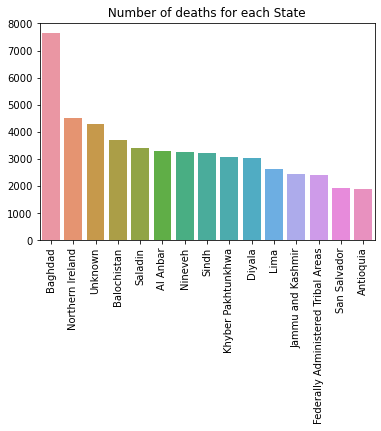

In [13]:
sb.barplot(state_df.index,state_df.values)
plt.title(' Number of deaths for each State ')
plt.xticks(rotation=90)
plt.show()

In [14]:
print('Most affected State is {}'.format(df['State'].value_counts().idxmax(),df['State'].value_counts().idxmax()))
print('Least affected State is {}'.format(df['State'].value_counts().idxmin(),df['State'].value_counts().idxmin()))

Most affected State is Baghdad
Least affected State is Phayao


### Inference on 'Region' Column

In [15]:
df.Region.value_counts()[:15]

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

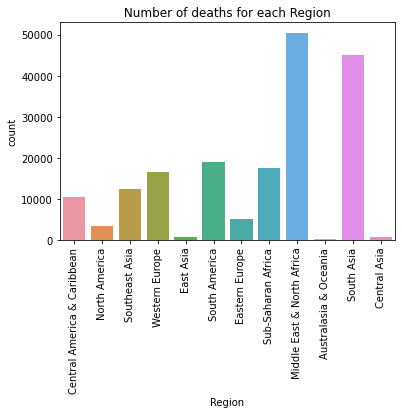

In [16]:
sb.countplot('Region',data = df)
plt.title(' Number of deaths for each Region ')
plt.xticks(rotation=90)
plt.show()

In [17]:
print('Most affected  region {}'.format(df['Region'].value_counts().idxmax(),df['Region'].value_counts().idxmax()))
print('Least affected region {} '.format(df['Region'].value_counts().idxmin(),df['Region'].value_counts().idxmin()))

Most affected  region Middle East & North Africa
Least affected region Australasia & Oceania 


### Inference on 'City' Column

In [18]:
city_df = df.City.value_counts()[:15]
city_df

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Bogota           984
Kirkuk           925
Beirut           918
Medellin         848
Name: City, dtype: int64

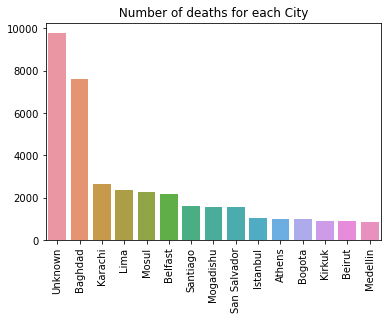

In [19]:
sb.barplot(city_df.index,city_df.values)
plt.title(' Number of deaths for each City ')
plt.xticks(rotation=90)
plt.show()

In [20]:
print('Most affected city is {}'.format(df['City'].value_counts().idxmax()))
print('least affected city is {}'.format(df['City'].value_counts().idxmin()))

Most affected city is Unknown
least affected city is Rancheria Payau


### Inference on 'Target1' Column

In [21]:
target1_df = df.target1.value_counts()[:15]
target1_df

Civilians         6461
Unknown           5918
Soldiers          3157
Patrol            2942
Checkpoint        2905
Vehicle           2785
Officers          1787
Village           1679
Military Unit     1533
Bus               1335
Convoy            1262
Unit              1195
Market            1194
Police Station    1190
Base               885
Name: target1, dtype: int64

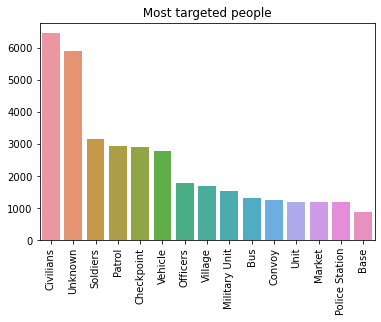

In [22]:
sb.barplot(target1_df.index,target1_df.values)
plt.title(' Most targeted people ')
plt.xticks(rotation=90)
plt.show()

In [23]:
print('Most targeted types are {} : {}.'.format(df.target1.value_counts().idxmax(),max(df.target1.value_counts())))
print('Least targeted types are {} : {}.'.format(df.target1.value_counts().idxmin(),min(df.target1.value_counts())))

Most targeted types are Civilians : 6461.
Least targeted types are Vehicle, French Delegation : 1.


### Inference on 'Group' Column

In [24]:
group_df = df.Group.value_counts()[:15]
group_df

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
Name: Group, dtype: int64

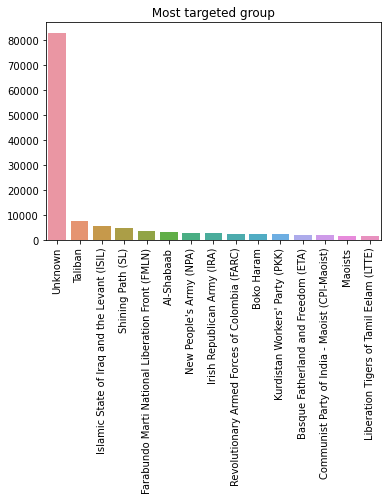

In [25]:
sb.barplot(group_df.index,group_df.values)
plt.title(' Most targeted group ')
plt.xticks(rotation=90)
plt.show()

In [26]:
print('Most affected group are {} : {}.'.format(df.Group.value_counts().idxmax(),max(df.Group.value_counts())))
print('Least affected group are {} : {}.'.format(df.Group.value_counts().idxmin(),min(df.Group.value_counts())))

Most affected group are Unknown : 82782.
Least affected group are Arab Socialist Baath Party of Iraq : 1.


### Inference on 'Targettype' Column

In [27]:
targtype_df = df.Targettype.value_counts()
targtype_df

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Targettype, dtype: int64

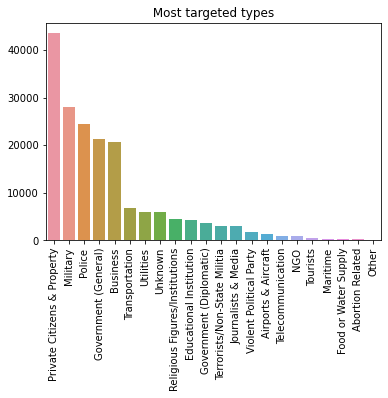

In [28]:
sb.barplot(targtype_df.index,targtype_df.values)
plt.title(' Most targeted types ')
plt.xticks(rotation=90)
plt.show()

In [29]:
print('Most affected targettypes are {} : {}.'.format(df.Targettype.value_counts().idxmax(),max(df.Targettype.value_counts())))
print('Least affected targettypes are {} : {}.'.format(df.Targettype.value_counts().idxmin(),min(df.Targettype.value_counts())))

Most affected targettypes are Private Citizens & Property : 43511.
Least affected targettypes are Other : 137.


### Inference on 'Weapon' Column

In [30]:
weapon_df = df.Weapon.value_counts()
weapon_df

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

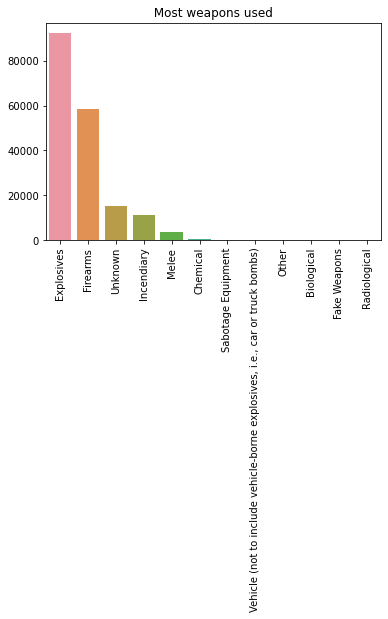

In [31]:
sb.barplot(weapon_df.index,weapon_df.values)
plt.title(' Most weapons used ')
plt.xticks(rotation=90)
plt.show()

In [32]:
print('Most deaths caused by  weapon {} : {}.'.format(df.Weapon.value_counts().idxmax(),max(df.Weapon.value_counts())))
print('Least deaths caused by weapon {} : {}.'.format(df.Weapon.value_counts().idxmin(),min(df.Weapon.value_counts())))

Most deaths caused by  weapon Explosives : 92426.
Least deaths caused by weapon Radiological : 14.


## Visualization of numerical Data Types

<AxesSubplot:xlabel='latitude'>

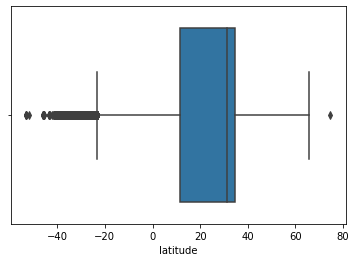

In [33]:
sb.boxplot(x = df['latitude'])

<AxesSubplot:xlabel='latitude', ylabel='Density'>

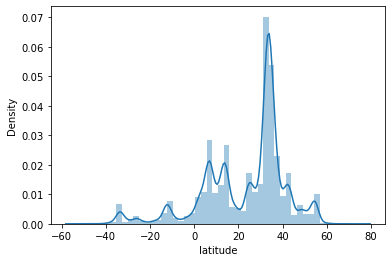

In [34]:
sb.distplot(df['latitude'])

<AxesSubplot:xlabel='kill'>

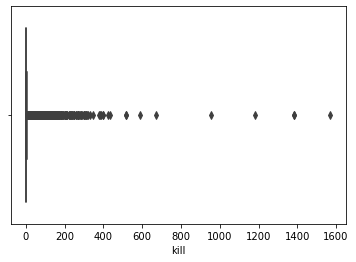

In [35]:
sb.boxplot(x = df['kill'])

Text(0.5, 6.79999999999999, 'Killed')

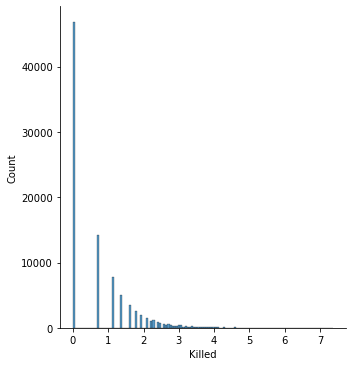

In [37]:
k = df['kill'].fillna(1,inplace=False)
k1 = [i for i in k if i>0]
sb.displot(np.log(k1))
plt.xlabel('Killed')

<AxesSubplot:xlabel='longitude'>

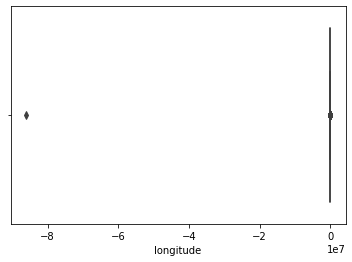

In [38]:
sb.boxplot(x = df['longitude'])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

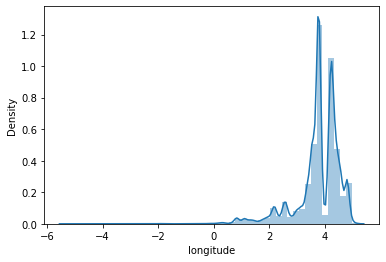

In [39]:
sb.distplot(np.log(df['longitude']))

<AxesSubplot:xlabel='Wound'>

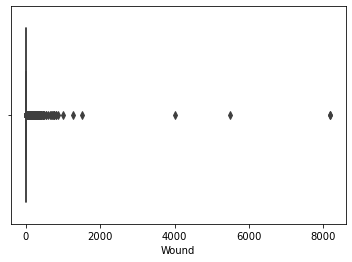

In [40]:
sb.boxplot(x = df['Wound'])

Text(0.5, 0, 'Wound')

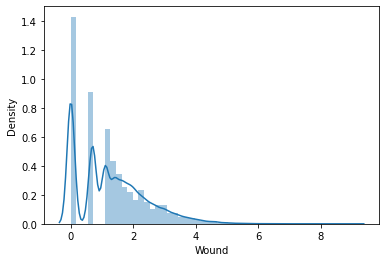

In [41]:
w = df['Wound'].fillna(0,inplace =False)
w1 = [i for i in w if i>0]
sb.distplot(np.log(w1))
plt.xlabel('Wound')

In [42]:
print('Number of deaths per year:')
df['Year'].value_counts(dropna=False).sort_index()

Number of deaths per year:


1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: Year, dtype: int64

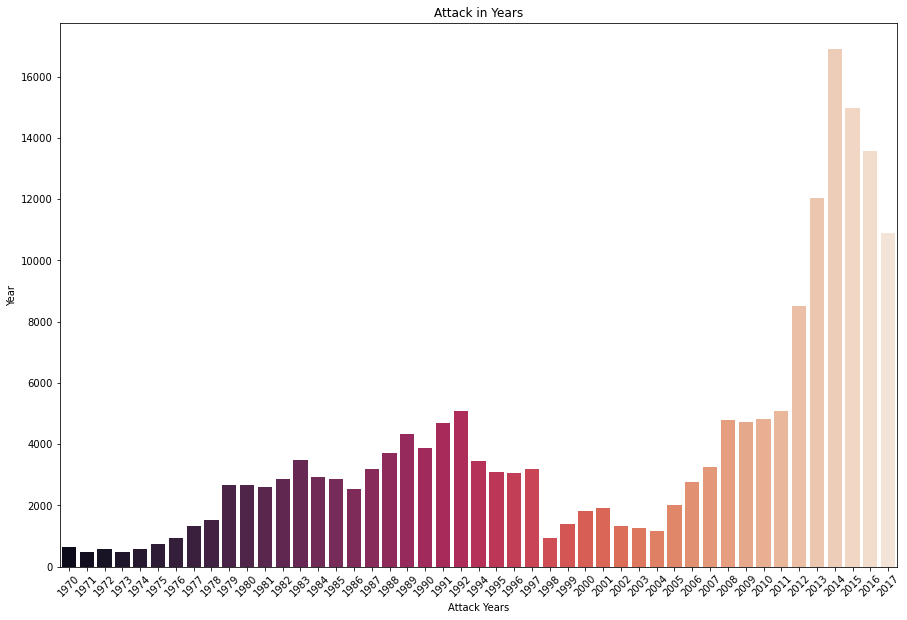

In [43]:
x_year = df['Year'].unique()
y_year = df['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(15,10))
plt.title("Attack in Years")
plt.xlabel("Attack Years")
plt.ylabel("Number of attacks each year")
plt.xticks(rotation=45)
sb.barplot(x=x_year, y=y_year, palette= 'rocket')
plt.show()

In [44]:
print('Number of deaths per Month:')
df['Month'].value_counts(dropna=False).sort_index()

Number of deaths per Month:


0        20
1     14936
2     13879
3     15257
4     15152
5     16875
6     15359
7     16268
8     15800
9     14180
10    15563
11    14906
12    13496
Name: Month, dtype: int64

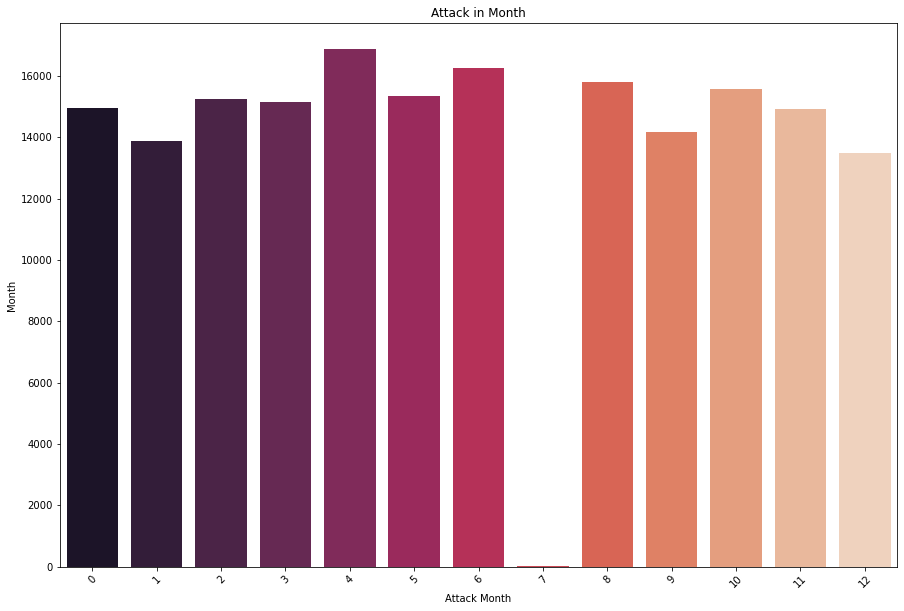

In [45]:
x_year = df['Month'].unique()
y_year = df['Month'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(15,10))
plt.title("Attack in Month")
plt.xlabel("Attack Month")
plt.ylabel("Number of attacks each Month")
plt.xticks(rotation=45)
sb.barplot(x=x_year, y=y_year, palette= 'rocket')
plt.show()

In [46]:
print('Number of deaths per Day:')
df['day'].value_counts(dropna=False).sort_index()

Number of deaths per Day:


0      891
1     6344
2     5954
3     6011
4     6153
5     5844
6     5781
7     5997
8     5859
9     6057
10    6064
11    5936
12    6012
13    6043
14    6028
15    6500
16    6112
17    5852
18    5880
19    5973
20    5930
21    5827
22    5799
23    5782
24    5752
25    5875
26    5823
27    5937
28    6027
29    5507
30    5046
31    3095
Name: day, dtype: int64

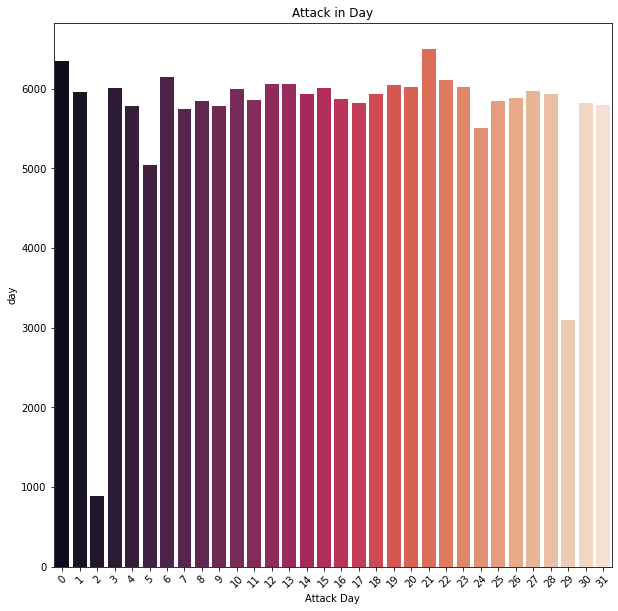

In [47]:
x_year = df['day'].unique()
y_year = df['day'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(10,10))
plt.title("Attack in Day")
plt.xlabel("Attack Day")
plt.ylabel("Number of attacks each Day")
plt.xticks(rotation=45)
sb.barplot(x=x_year, y=y_year, palette= 'rocket')
plt.show()

In [48]:
group_killed= df[['Group','kill']].groupby(['Group'],axis=0).sum().sort_values('kill', ascending=False).head(15)
group_killed

,kill
Group,
Unknown,112367.0
Islamic State of Iraq and the Levant (ISIL),38923.0
Taliban,29410.0
Boko Haram,20328.0
Shining Path (SL),11601.0
Liberation Tigers of Tamil Eelam (LTTE),10989.0
Al-Shabaab,9330.0
Farabundo Marti National Liberation Front (FMLN),8065.0
Nicaraguan Democratic Force (FDN),6662.0


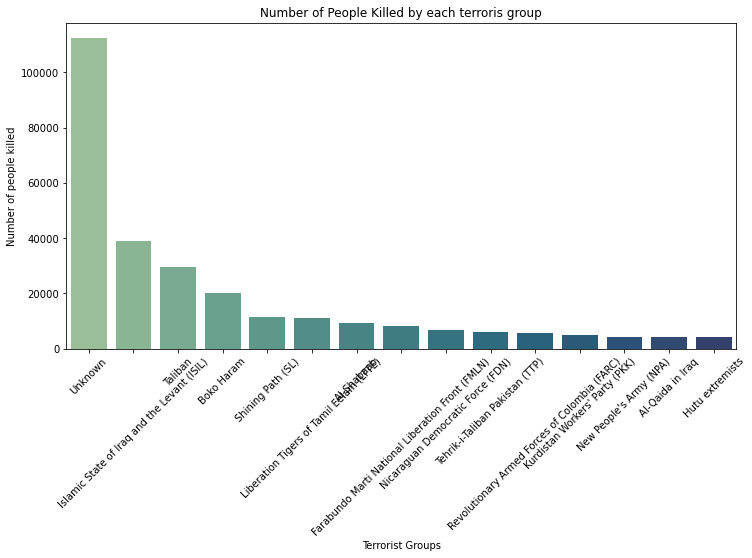

In [49]:
plt.subplots(figsize=(12,6))
sb.barplot(group_killed.index, group_killed.kill.values,palette="crest")
plt.title('Number of People Killed by each terroris group')
plt.xlabel('Terrorist Groups')
plt.ylabel('Number of people killed')
plt.xticks(rotation= 45)
plt.show()

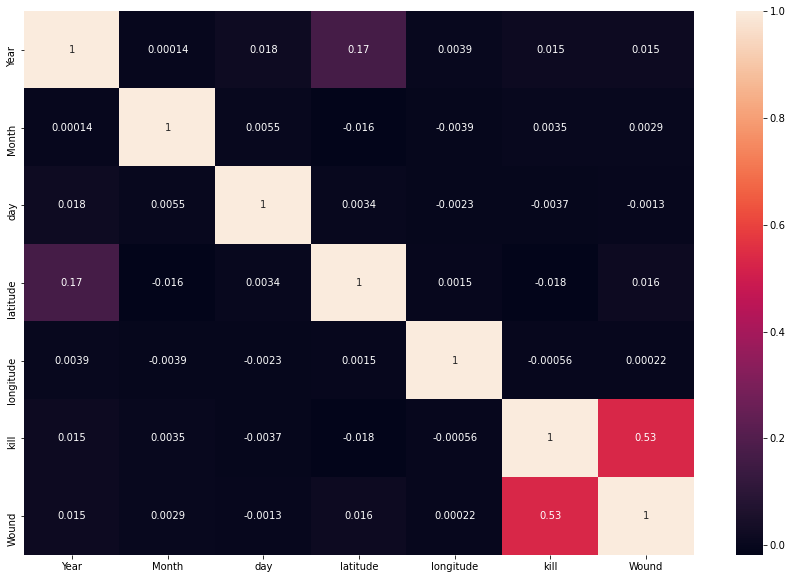

In [50]:
plt.figure(figsize=(15,10))
sb.heatmap(df.corr(), annot= True)
plt.show()

### From the above plot we can infer that most of the people were killed were injured/wounded people

In [ ]:
#As we can see the correlation between kill and wound column has a correlation more than 50%.